In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
mnist = fetch_openml('mnist_784')

C:\Users\realme\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
mnist.target = mnist.target.astype(np.int8)

In [3]:
X, y = mnist['data'], mnist['target']

In [4]:
import matplotlib
import matplotlib.pyplot as plt

In [5]:
y[440]

0

In [6]:
digit = X.iloc[440]

In [7]:
digit = digit.values.reshape(28,28)

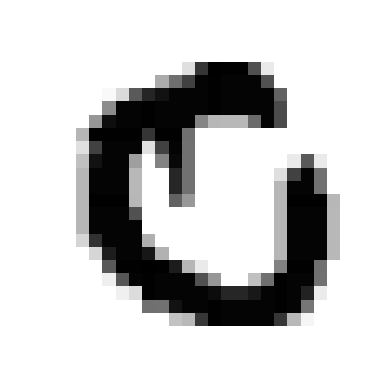

In [8]:
plt.imshow(digit, cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()

In [9]:
X_train = X[:60000]
X_test = X[60000:]
y_train = y[:60000]
y_test = y[60000:]

In [10]:
shuffling_index = np.random.permutation(60000)

In [11]:
X_train, y_train = X_train.iloc[shuffling_index], y_train.iloc[shuffling_index]

## binary classification

In [12]:
y_train_6 = y_train == 6
y_test_6 = y_test == 6

In [13]:
from sklearn.linear_model import SGDClassifier
sgd_classifier = SGDClassifier(max_iter = 20, tol=100000000000000000)
sgd_classifier.fit(X_train, y_train_6)

SGDClassifier(max_iter=20, tol=100000000000000000)

In [14]:
sgd_classifier.predict([X.iloc[32]])

C:\Users\realme\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_classifier, X_train, y_train_6, cv = 4)

array([0.97873333, 0.981     , 0.9812    , 0.983     ])

### making a dumb classifier

In [23]:
from sklearn.base import BaseEstimator

class DumbClassifier(BaseEstimator):
    def fit(self, X, y = None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype = bool)

In [24]:
dumbClassifier = DumbClassifier()
cross_val_score(dumbClassifier, X_train, y_train_6, scoring = "accuracy")

array([0.89941667, 0.89958333, 0.90733333, 0.90083333, 0.89966667])

In [25]:
sum(y_train_6)/60000

0.09863333333333334

### confusion matrix

In [27]:
from sklearn.model_selection import cross_val_predict

In [29]:
y_train_pred = cross_val_predict(sgd_classifier, X_train, y_train_6)

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
confusion_matrix(y_train_6, y_train_pred)

array([[52723,  1359],
       [  411,  5507]], dtype=int64)

true - negatives = 52723
flase - positives = 1359
false - negatives = 411
true - positives = 5507

In [33]:
y_train_perfect = y_train_6

In [34]:
confusion_matrix(y_train_6, y_train_perfect)

array([[54082,     0],
       [    0,  5918]], dtype=int64)

### precision

In [35]:
from sklearn.metrics import precision_score

In [38]:
precision_score(y_train_6, y_train_pred)

0.8020681619574715

In [40]:
precision_score(y_train_6, y_train_perfect)

1.0

### recall 

recall = sensitivity = true-positives/(true-positives + flase-negatives)

In [41]:
from sklearn.metrics import recall_score

In [42]:
recall_score(y_train_6, y_train_pred)

0.9305508617776276

### f1 scores (harmonic mean)

f1 = 2/(1/precision + 1/recall)

In [44]:
from sklearn.metrics import f1_score

In [45]:
f1_score(y_train_6, y_train_pred)

0.8615456821026283

In [69]:
sgd_classifier.predict([X.iloc[69999]])

C:\Users\realme\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [70]:
digit = X.iloc[69999].values.reshape(28,28)

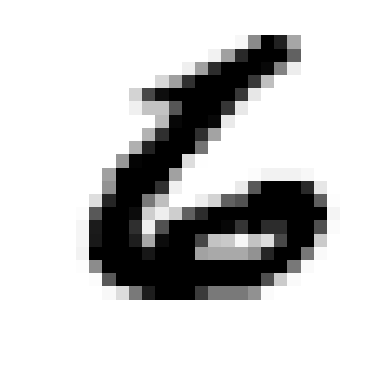

In [71]:
plt.imshow(digit, cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()

In [73]:
y_score = sgd_classifier.decision_function([X.iloc[69999]])

C:\Users\realme\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


In [74]:
threshold = 20000
y_score > threshold 

array([ True])

In [78]:
from sklearn.metrics import precision_recall_curve

In [84]:
scores = cross_val_predict(sgd_classifier, X_train, y_train_6, method = "decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train_6, scores)

In [85]:
precisions

array([0.09863333, 0.09863498, 0.09863662, ..., 1.        , 1.        ,
       1.        ])

In [86]:
recalls

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
       3.37952011e-04, 1.68976005e-04, 0.00000000e+00])

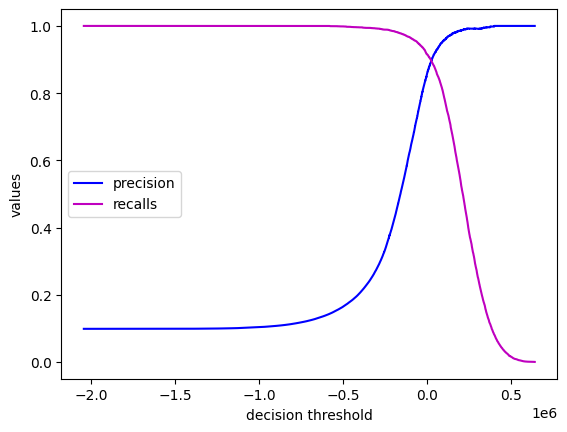

In [88]:
plt.plot(thresholds, precisions[:-1], 'b-', label = "precision")
plt.plot(thresholds, recalls[:-1], 'm-', label = "recalls")
plt.xlabel("decision threshold")
plt.ylabel('values')
plt.legend()

(0.0, 1.0, 0.0, 1.0)

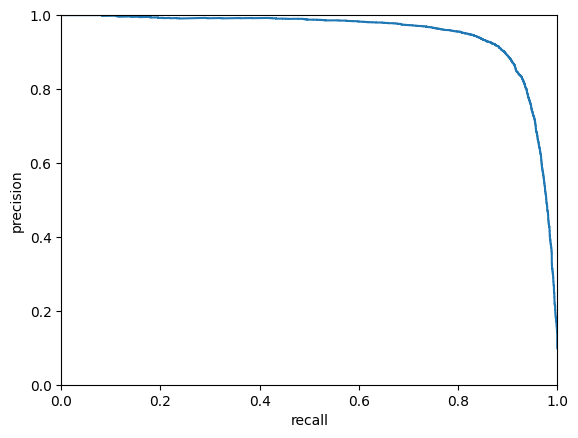

In [91]:
plt.plot(recalls, precisions)
plt.xlabel('recall')
plt.ylabel('precision')
plt.axis([0, 1, 0, 1])

In [92]:
recalls > 0.8

array([ True,  True,  True, ..., False, False, False])

In [94]:
t = [i for i, x in enumerate(recalls > 0.8) if x]

In [100]:
operating_index = t[len(t) - 1]
operating_recall = recalls[operating_index]
operating_precision = precisions[operating_index]
operating_threshold = thresholds[operating_index]

In [101]:
operating_threshold

95600.25943378599

In [102]:
y_train_pred_80 = (scores > operating_threshold)

In [103]:
precision_score(y_train_6, y_train_pred_80)

0.9553985872855701

In [104]:
recall_score(y_train_6, y_train_pred_80)

0.7999324095978371

### ROC curve

In [105]:
from sklearn.metrics import roc_curve

In [106]:
fpr, tpr, thresholds = roc_curve(y_train_6, scores)

Text(0, 0.5, 'TPR: true positive rate')

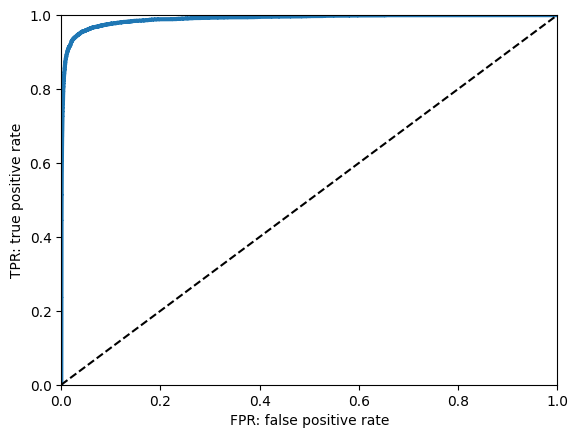

In [110]:
plt.plot(fpr, tpr, lw = 3)
plt.plot([0, 1], [0,1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel("FPR: false positive rate")
plt.ylabel("TPR: true positive rate")

In [113]:
from sklearn.metrics import roc_auc_score

In [115]:
roc_auc_score(y_train_6, scores)

0.9898983143254647

In [116]:
from sklearn.ensemble import RandomForestClassifier

In [118]:
forest_clf = RandomForestClassifier()

In [119]:
probabs = cross_val_predict(forest_clf, X_train, y_train_6, method = "predict_proba")

In [122]:
forest_scores = probabs[:,1]

In [123]:
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_6, forest_scores)

Text(0, 0.5, 'TPR: true positive rate')

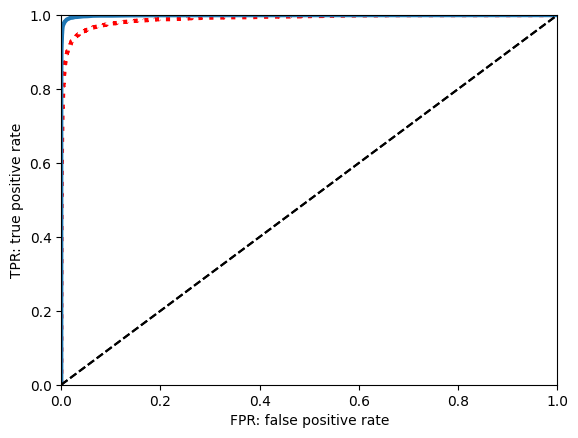

In [126]:
plt.plot(fpr, tpr,'r:', lw = 3,  label = "SGD")
plt.plot(fpr_forest, tpr_forest, linewidth = 3, label = "Forest")
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 1], [0,1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel("FPR: false positive rate")
plt.ylabel("TPR: true positive rate")

In [128]:
roc_auc_score(y_train_6, forest_scores)

0.9991781392902939